In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
sns.set_theme()

In [3]:
vg = pd.read_csv('top100videogamesales.csv')
vg.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


# Regional Sales by Publisher: Create a stacked column (or bar) chart to show the sales by region for each publisher in the data. Explain your chart with markdown and detail which publisher had the most sales.

This is a stacked bar chart showing the number of video game sales by publisher. Sales are divided into four regions.

Nintendo had the most sales, followed by Activision and Take-Two Interactive. The majority of sales for each of the top three publishers came from North America.

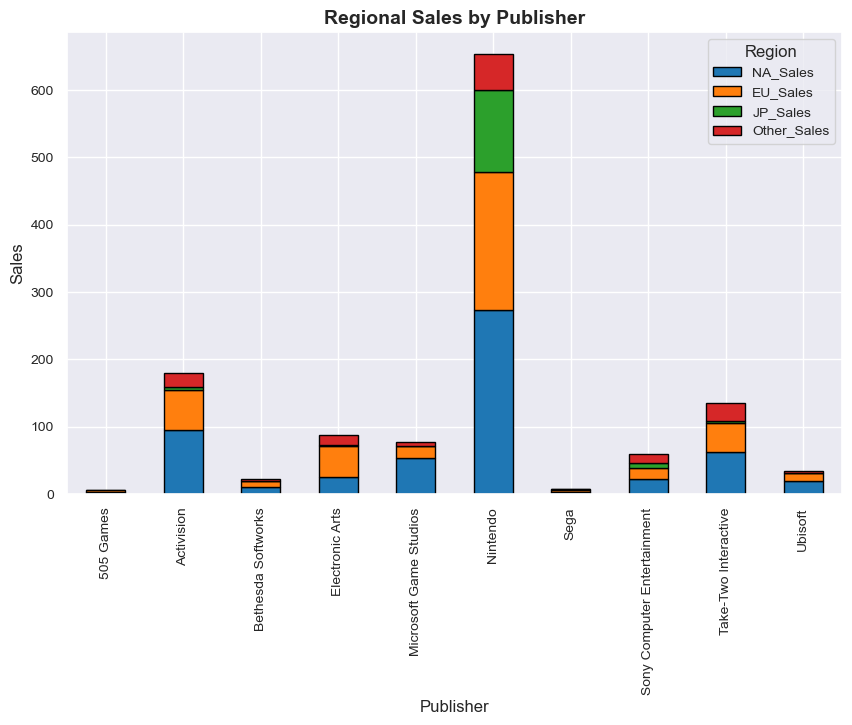

In [52]:
sales_by_publisher = vg.groupby('Publisher')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

ax = sales_by_publisher.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors, edgecolor='black')

plt.title('Regional Sales by Publisher', fontsize=14, fontweight='bold')
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.legend(title='Region', fontsize=10)

plt.tick_params(axis='both', which='major', labelsize=10)

plt.show()

# Global Sales by Year: Create a line chart to show the total global sales for each year. Explain the result of the chart in markdown.

Peak total sales occured in 2006, due in large part to the success of Wii Sports (82.74 million in global sales). After 2006 there is a negative trend through 2015. The year with the lowest sales was 2003, followed by 2002.

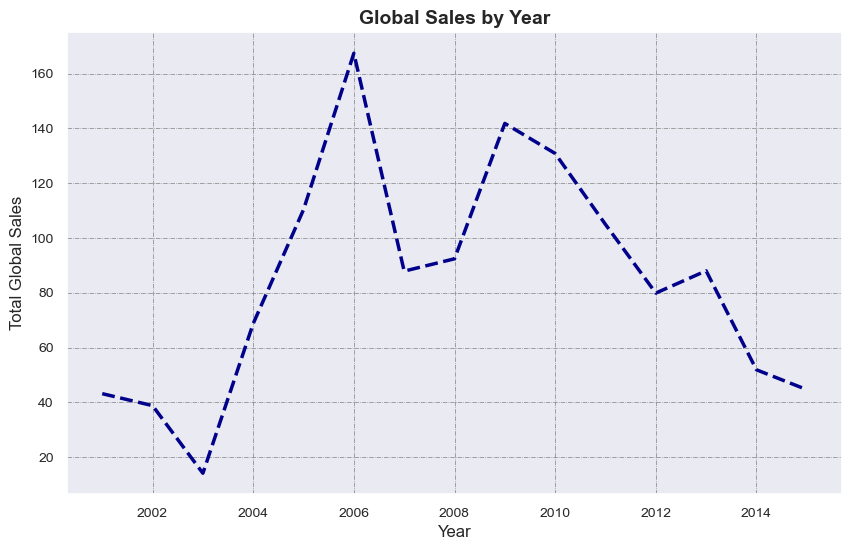

In [30]:
global_sales_by_year = vg.groupby('Year')['Global_Sales'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=global_sales_by_year.index, y=global_sales_by_year.values, color='darkblue', linewidth=2.5, linestyle='--')

plt.title('Global Sales by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Global Sales', fontsize=12)

plt.grid(True, linestyle='-.', linewidth=0.5, color='gray')
plt.tick_params(axis='both', which='major', labelsize=10)

plt.show()

# Global Sales Distribution for Action Games: Create a histogram to show the global sales distribution for games with Action as the genre. Explain the chart with markdown.

The x-axis represents the total global sales in millions of dollars, and the y-axis represents the number of video games that fall into each bin. The highest concentration is in the 6.5-9 million dollar range.

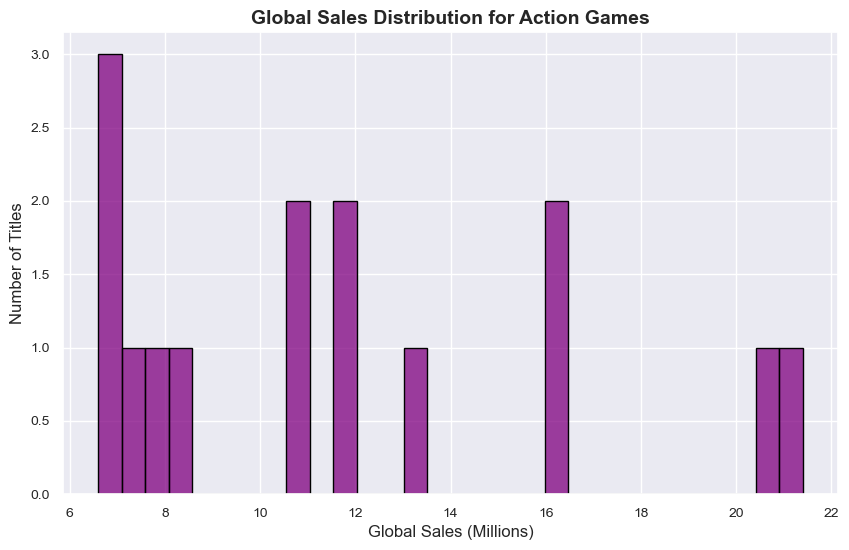

In [53]:
action_games = vg[vg['Genre'] == 'Action']

plt.figure(figsize=(10, 6))
sns.histplot(action_games['Global_Sales'], kde=False, bins=30, color='purple', edgecolor='black')

plt.title('Global Sales Distribution for Action Games', fontsize=14, fontweight='bold')
plt.xlabel('Global Sales (Millions)', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)

plt.tick_params(axis='both', which='major', labelsize=10)

plt.show()

# North American Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

This pie chart shows the percentages of video games sales in North America categorized by genre. The most popular genres are "shooter" (24.8%), "sports" (15.0%), and "action" (13.8%). Any games with sales amounting to less than 5.6% of the market are grouped into the "other" category. I chose this number to keep the NA and EU versions of the chart consistent in number of categories displayed as well as keeping a consistent color pattern. The breakdown of the "other" category is detailed below the chart.

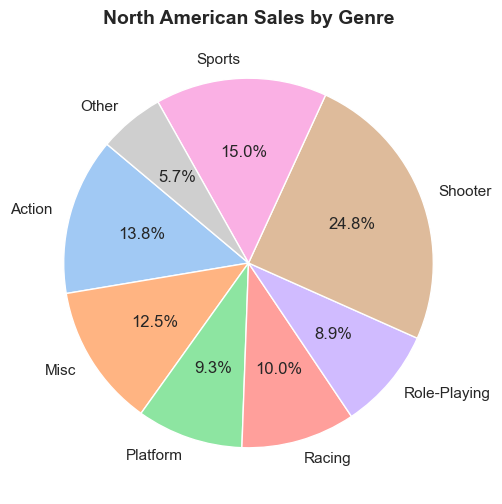

Genres included in the 'Other' category with their respective percentages of total NA sales: Fighting: 2.5%, Puzzle: 0.6%, Simulation: 2.6%


In [34]:
na_sales_by_genre = vg.groupby('Genre')['NA_Sales'].sum()
total_na_sales = na_sales_by_genre.sum()

threshold = 0.056 * na_sales_by_genre.sum()
small_categories = na_sales_by_genre[na_sales_by_genre < threshold]
na_sales_by_genre = na_sales_by_genre[na_sales_by_genre >= threshold]
na_sales_by_genre['Other'] = small_categories.sum()

colors = sns.color_palette('pastel')

plt.figure(figsize=(10, 6))
plt.pie(na_sales_by_genre, labels=na_sales_by_genre.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('North American Sales by Genre', fontsize=14, fontweight='bold')

plt.show()

other_percentages = (small_categories / total_na_sales) * 100
other_details = ', '.join([f'{genre}: {percent:.1f}%' for genre, percent in other_percentages.items()])

print(f"Genres included in the 'Other' category with their respective percentages of total NA sales: {other_details}")

# European Sales by Genre: Create a pie chart to show the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart) Detail what is included in the other category. Explain the chart using markdown.

This pie chart shows the percentages of video games sales in the European market categorized by genre. The most popular genres are "sports" (19.7%), "shooter" (19.6%), and "action" (13.8%). The breakdown of the "other" category is detailed below the chart.

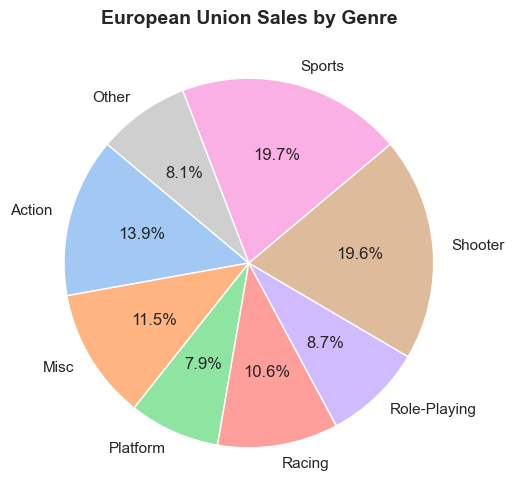

Genres included in the 'Other' category with their respective percentages of total EU sales: Fighting: 1.2%, Puzzle: 1.3%, Simulation: 5.6%


In [35]:
eu_sales_by_genre = vg.groupby('Genre')['EU_Sales'].sum()
total_eu_sales = eu_sales_by_genre.sum()

threshold = 0.056 * eu_sales_by_genre.sum()
small_categories = eu_sales_by_genre[eu_sales_by_genre < threshold]
eu_sales_by_genre = eu_sales_by_genre[eu_sales_by_genre >= threshold]
eu_sales_by_genre['Other'] = small_categories.sum()

colors = sns.color_palette('pastel')

plt.figure(figsize=(10, 6))
plt.pie(eu_sales_by_genre, labels=eu_sales_by_genre.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('European Union Sales by Genre', fontsize=14, fontweight='bold')

plt.show()

other_percentages = (small_categories / total_eu_sales) * 100
other_details = ', '.join([f'{genre}: {percent:.1f}%' for genre, percent in other_percentages.items()])

print(f"Genres included in the 'Other' category with their respective percentages of total EU sales: {other_details}")

# Explain differences and similarities between the North American and European charts in markdown.

The most popular genres in North America are "shooter" (24.8%), "sports" (15.0%), and "action" (13.8%). The most popular genres in Europe are "sports" (19.7%), "shooter" (19.6%), and "action" (13.8%). So both regions have the same genres in the top three, but the order and percentages differ. The three genres in the "other" category are also the same, but again the percentages are different.

# Count of Games by Platform: Create a bar (or column) chart to show the total number of games created for each platform in the dataset. Explain the results in markdown.

This chart shows the number of games in the top 100 categorized by platform. The platform with the most games is Nintendo, followed by Playstation, and then XBox.

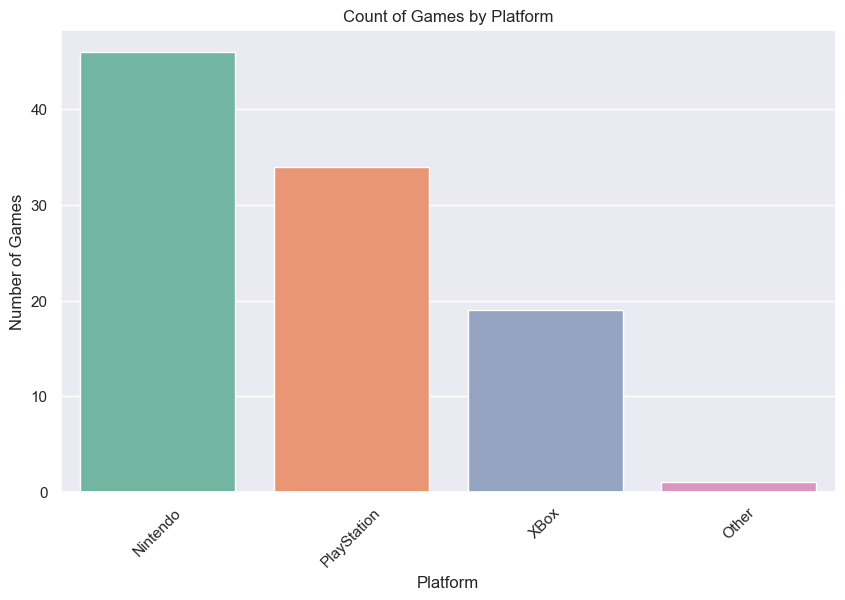

In [38]:
games_by_platform = vg['Platform'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=games_by_platform.index, y=games_by_platform.values, palette="Set2")

plt.title('Count of Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Number of Games')

plt.xticks(rotation=45)

plt.show()

# Extra Credit

# Determine the appropriate charts to answer the following questions

    What genre of game is present the most in the top 100 games from 2000-2015? 
        Bar chart
    What percentage of global sales does PlayStation have in the dataset? 
        Pie chart
    What is the distribution of sales for Shooter games?
        Histogram


# What genre of game is present the most in the top 100 games from 2000-2015?

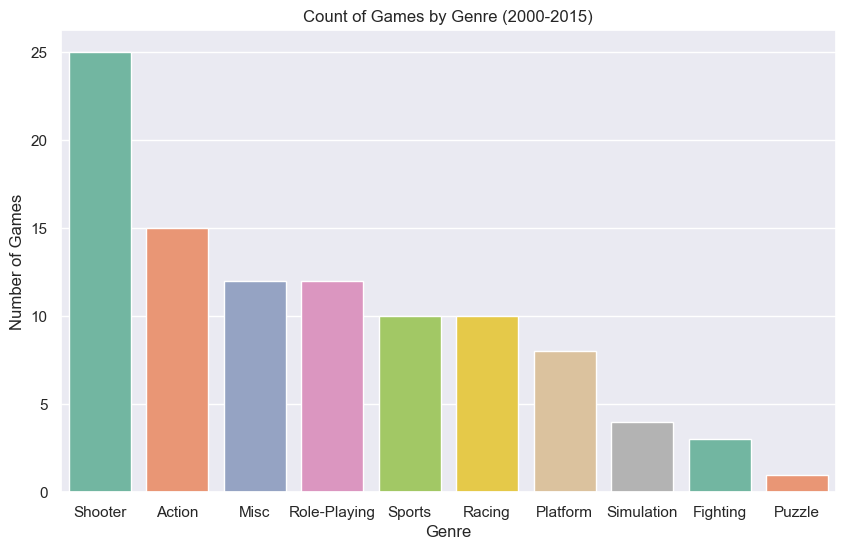

In [45]:
filtered_vg = vg[(vg['Year'] >= 2000) & (vg['Year'] <= 2015)]

genre_counts = filtered_vg['Genre'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="Set2")

plt.title('Count of Games by Genre (2000-2015)')
plt.xlabel('Genre')
plt.ylabel('Number of Games')

plt.show()

# What percentage of global sales does PlayStation have in the dataset?

In [17]:
sales_by_platform = vg.groupby('Platform')['Global_Sales'].sum()

playstation_sales = sales_by_platform[['PlayStation']].sum()

total_sales = sales_by_platform.sum()

playstation_percentage = (playstation_sales / total_sales) * 100

print(f"Percentage of global sales for PlayStation: {playstation_percentage:.2f}%")

Percentage of global sales for PlayStation: 27.08%


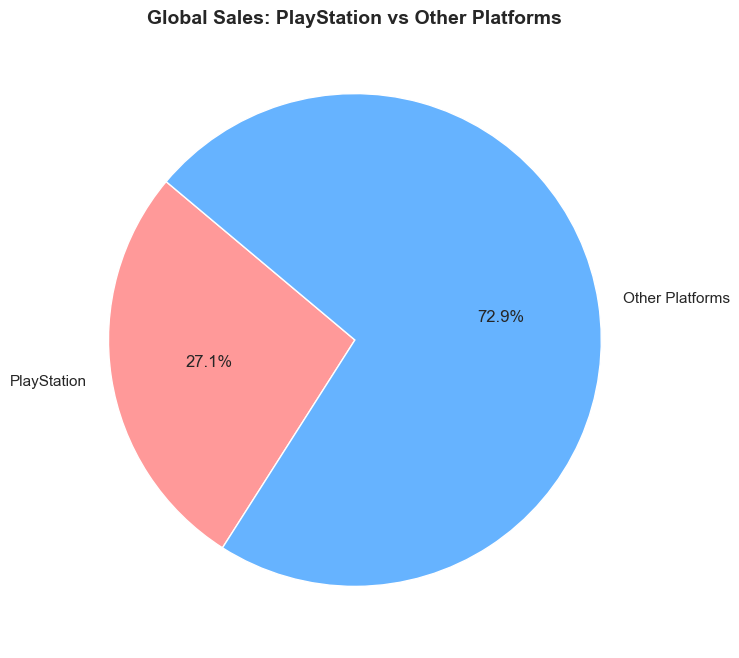

In [40]:
other_platforms_sales = total_sales - playstation_sales

pie_data = [playstation_sales, other_platforms_sales]
labels = ['PlayStation', 'Other Platforms']
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Global Sales: PlayStation vs Other Platforms', fontsize=14, fontweight='bold')

plt.show()

# What is the distribution of sales for Shooter games?

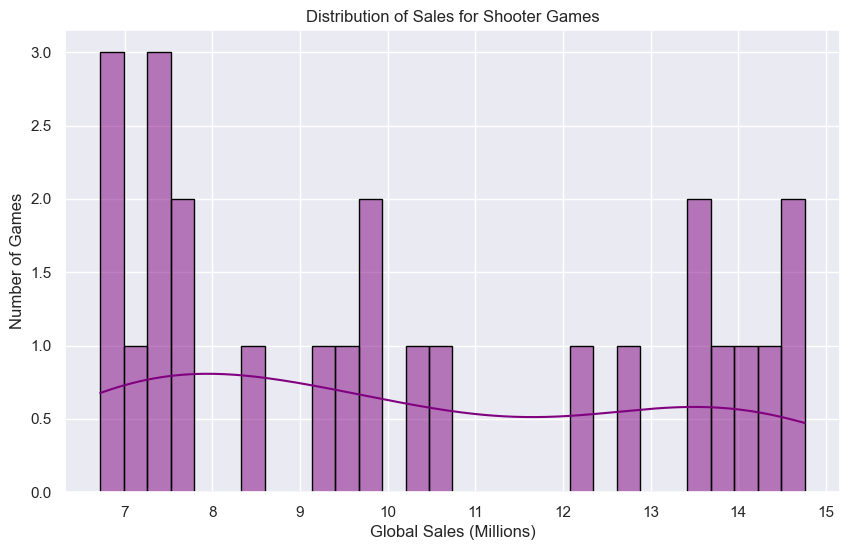

In [51]:
shooter_games = vg[vg['Genre'] == 'Shooter']

plt.figure(figsize=(10, 6))
sns.histplot(shooter_games['Global_Sales'], kde=True, bins=30, color='purple', edgecolor='black')

plt.title('Distribution of Sales for Shooter Games')
plt.xlabel('Global Sales (Millions)')
plt.ylabel('Number of Games')

plt.show()